In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import pickle 
import json

In [2]:
load=load_breast_cancer()
df=pd.DataFrame(load.data,columns=load.feature_names)
df["Target"]=load.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


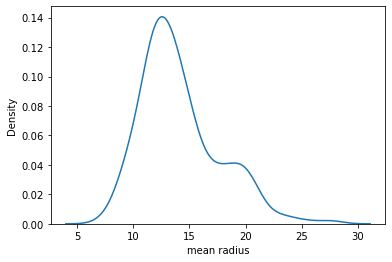

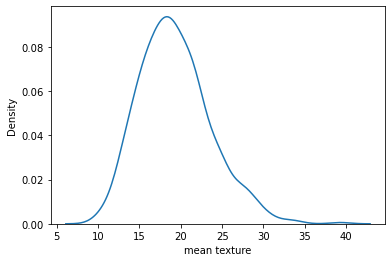

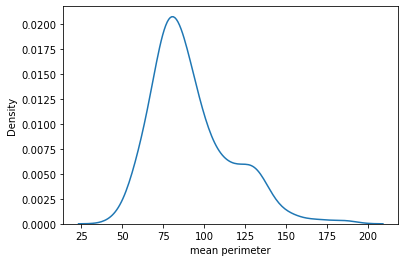

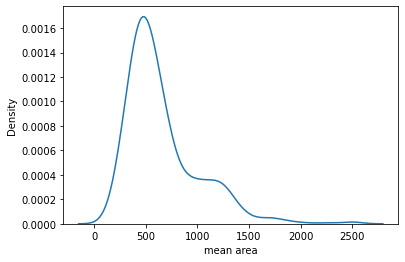

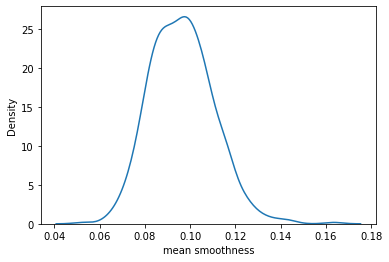

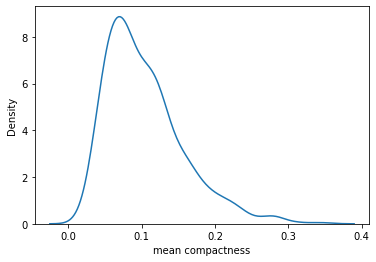

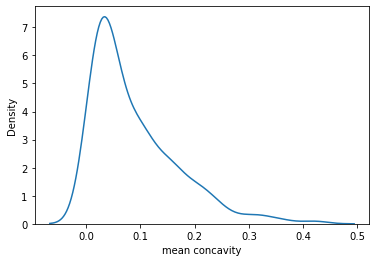

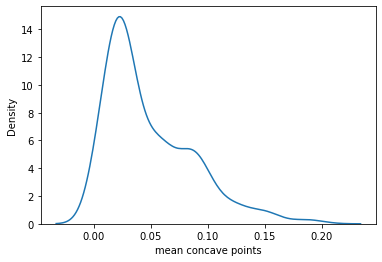

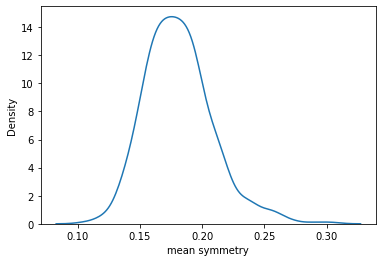

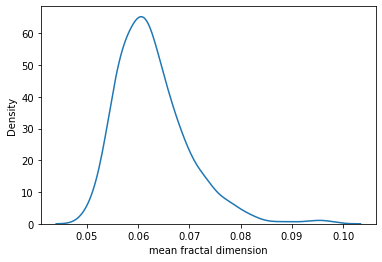

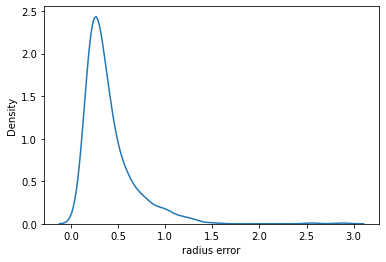

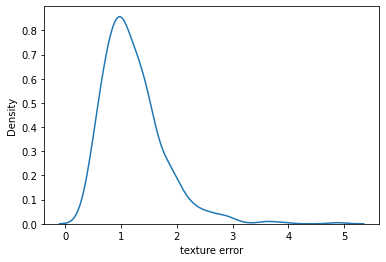

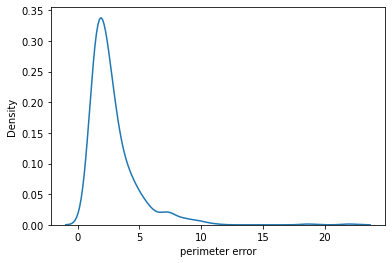

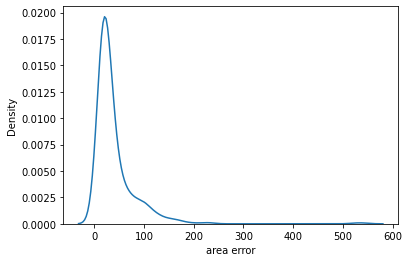

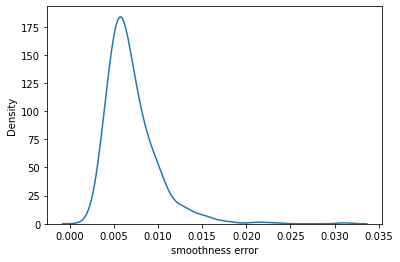

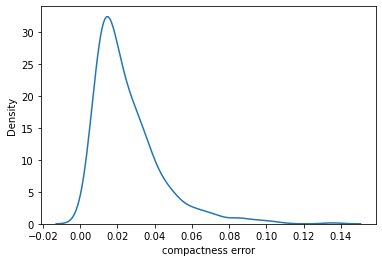

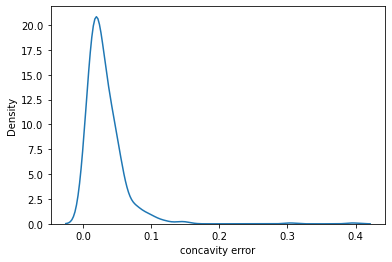

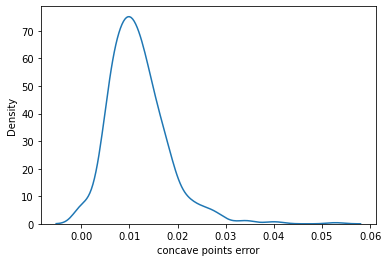

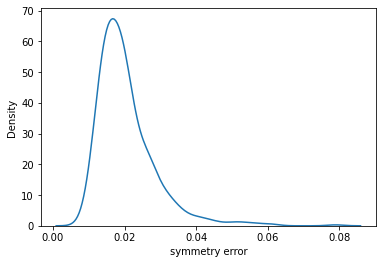

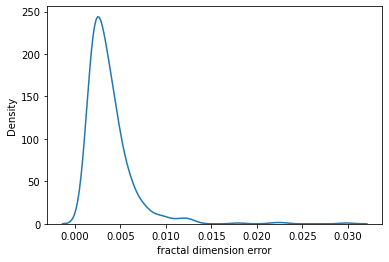

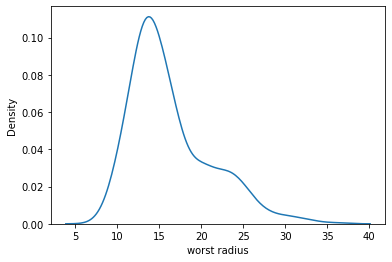

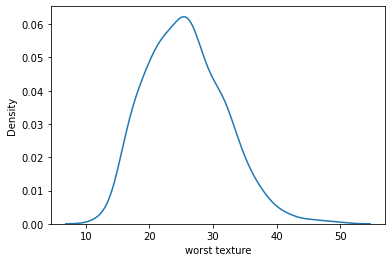

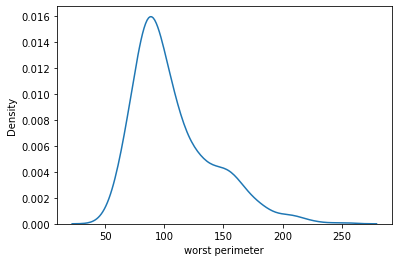

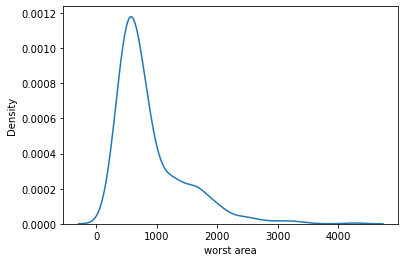

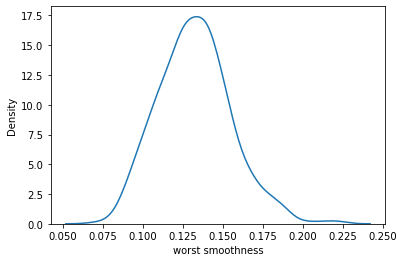

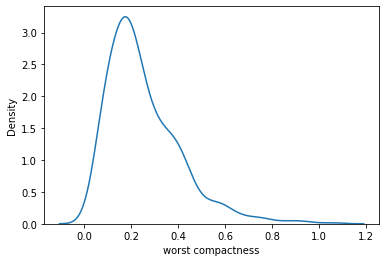

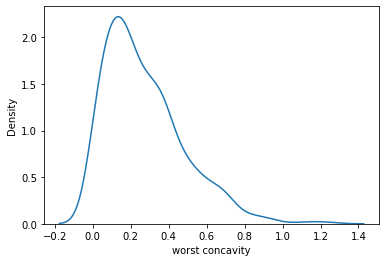

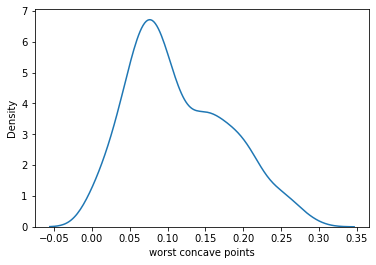

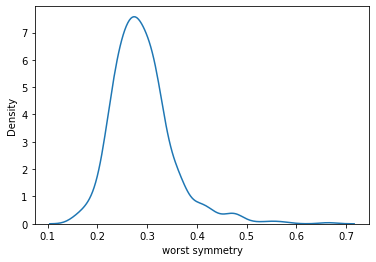

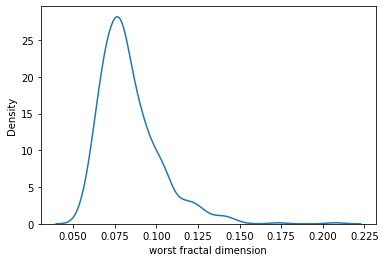

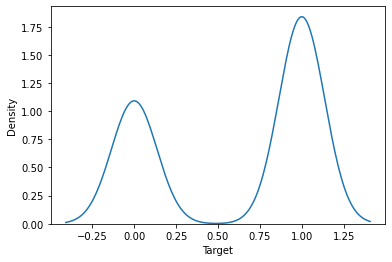

In [5]:
# Analysis
# Univariate Analysis
for i in df.describe():
    sns.kdeplot(df[i])
    plt.show()
    

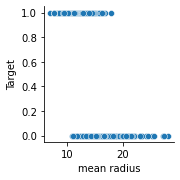

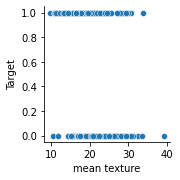

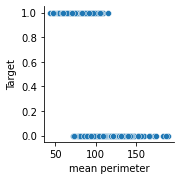

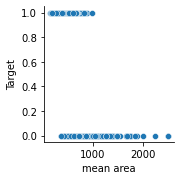

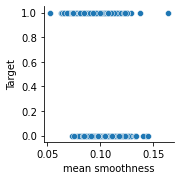

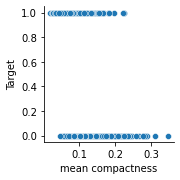

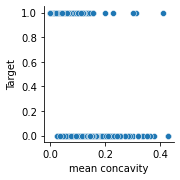

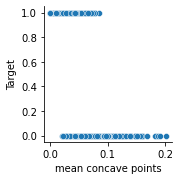

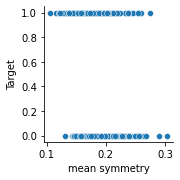

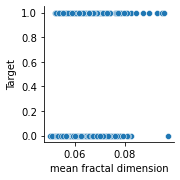

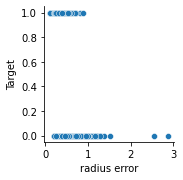

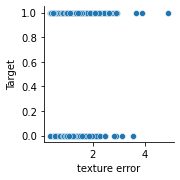

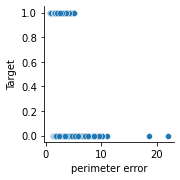

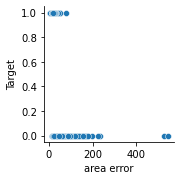

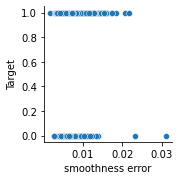

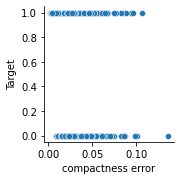

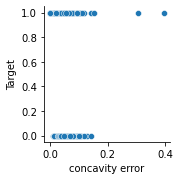

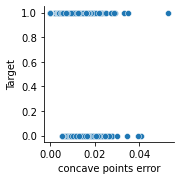

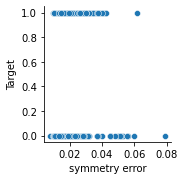

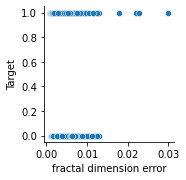

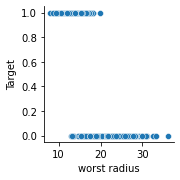

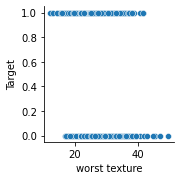

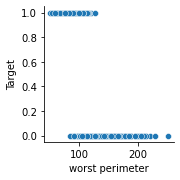

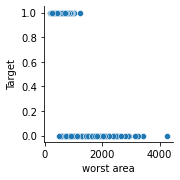

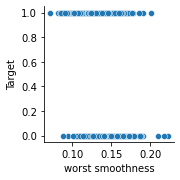

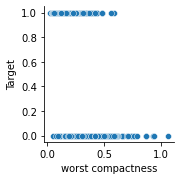

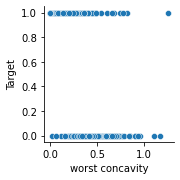

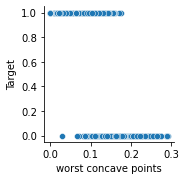

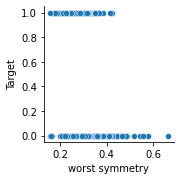

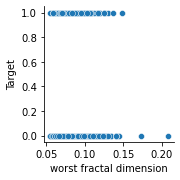

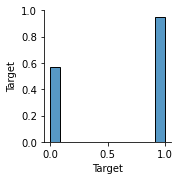

In [6]:
# Bivariate Analysis
for i in df.describe():
    sns.pairplot(df,x_vars=[i],y_vars=["Target"])
    plt.show()

In [7]:
# Feature Engg
# AS the data is already in numerical form so we dont need any feature engg.over here 


# Model Traing

In [8]:
X=df.drop("Target",axis=1)
y=df["Target"]

In [9]:
X.shape

(569, 30)

In [10]:
y.value_counts()

1    357
0    212
Name: Target, dtype: int64

In [11]:
# splitiing of data 
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((426, 30), (143, 30), (426,), (143,))

# Feature scaling

In [12]:
# As the data is not on same scale we need to do feature scaling 

std=StandardScaler()
train_std=std.fit_transform(X_train,y_train)


In [13]:
test_std=std.fit_transform(X_test,y_test)

In [14]:
X_train=pd.DataFrame(train_std,columns=X_train.columns)
X_test=pd.DataFrame(test_std,columns=X_test.columns)


In [15]:
def evaluation(model,X_actual,y_actual):
    pred=model.predict(X_actual)
    cm=confusion_matrix(y_actual,pred)
    print(f"The confusion matrix ={cm}")
    clf=classification_report(y_actual,pred)
    print(f"The classification report={clf}")
    acc=accuracy_score(y_actual,pred)
    print(f"The accurracy score={acc}")


# Random_forest

In [17]:
ran_forest=RandomForestClassifier(random_state=12)
ran_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [18]:
evaluation(ran_forest,X_train,y_train)

The confusion matrix =[[159   0]
 [  0 267]]
The classification report=              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

The accurracy score=1.0


In [19]:
evaluation(ran_forest,X_test,y_test)

The confusion matrix =[[53  0]
 [ 4 86]]
The classification report=              precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       1.00      0.96      0.98        90

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

The accurracy score=0.972027972027972


In [20]:
# This is still not giving genralised model,so we need to do hyper_parameter tuning to get genralised model
params={"n_estimators":np.arange(5,120,5),"max_depth":np.arange(1,10),"min_samples_split":np.arange(1,10),"min_samples_split":np.arange(1,10)}
params


{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115]),
 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [23]:
rscv=RandomizedSearchCV(ran_forest,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115])})

In [24]:
rscv.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=105, random_state=12)

In [25]:
rscv.best_params_

{'n_estimators': 105, 'min_samples_split': 2, 'max_depth': 9}

In [26]:
hyp_ran=RandomForestClassifier(max_depth=9, min_samples_split=2, n_estimators=105,
                       random_state=12)
hyp_ran.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=105, random_state=12)

In [27]:
evaluation(hyp_ran,X_train,y_train)

The confusion matrix =[[159   0]
 [  0 267]]
The classification report=              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

The accurracy score=1.0


In [28]:
evaluation(hyp_ran,X_test,y_test)

The confusion matrix =[[53  0]
 [ 4 86]]
The classification report=              precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       1.00      0.96      0.98        90

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

The accurracy score=0.972027972027972


In [31]:
with open ("std.pickle","wb") as f:
    pickle.dump(std,f)

In [32]:
with open ("model.pickle","wb") as f:
    pickle.dump(hyp_ran,f)

In [37]:
column_list=list(X_train.columns)
with open ("column_list.json","w") as f:
    json.dump(column_list,f)